In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply

In [59]:

# the relative path of the stroke csv dataset is saved into the variable data for ease of use
data = './data/stroke.csv'

# The data is read and saved in a variable (stroke)
stroke = pd.read_csv(data)

stroke = pd.DataFrame(stroke)


stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [60]:
# get and print info on the stroke dataframe
stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [61]:
# checking for all the unique values under the work_type variable/column
stroke["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [62]:
# data standardization - chnaging the uppercase 'R' to lowercase 'r' 
stroke = stroke.rename(columns={"Residence_type": "residence_type"})


In [63]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [64]:
stroke_copy = stroke.copy() # Creating a copy of the stroke dataset for experimentation
stroke_dropna = stroke.copy() # dataset copy to be used for dropna() action
stroke_fillna = stroke.copy() # Dataset copy to be used for data imputing using forward/back filling method


In [65]:
# stroke_copy.fillna(method='ffill')
# stroke_copy.fillna(method='bfill')

# Dropping rows that have missing or NaN values in one or more rows, then printing the remaining rows in the dataset  
# Rows without Nan or missing values
stroke_dropna = stroke_dropna.dropna()
stroke_dropna

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [66]:
# stroke_copy = pd.DataFrame(stroke_copy)

# Printing all rows with missing or 'NaN' values in one or more cells
nan_rows = stroke_copy[stroke_copy.isnull().any(axis=1)]
nan_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [67]:
# to filter by column - This confirms only bmi has missing or NaN (Not a number) values
# futher exploration can be done on this copy of the dataset
stroke_copy[stroke_copy['bmi'].isnull()]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [68]:
stroke_copy = stroke_copy.drop(['id'], axis=1)
stroke_copy

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


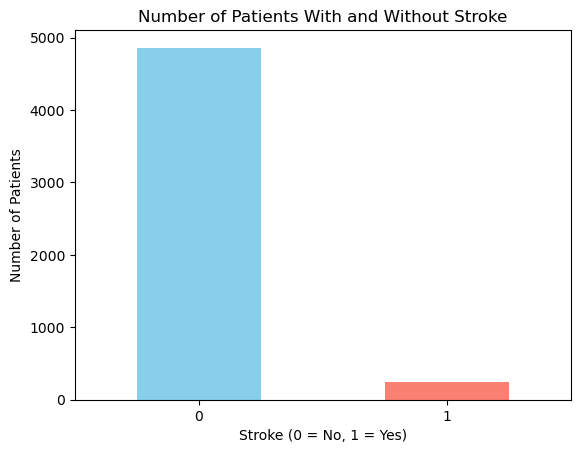

In [69]:
# Define variables for Graphic 1: General Vision stroke = vrs stroke =0 
#Count total observation in stroke category
sum_stroke = stroke_copy['stroke'].value_counts()

# Plot
sum_stroke.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Patients With and Without Stroke')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

In [70]:
stroke_copy['stroke'].sum()


249

In [71]:
with_stroke = stroke.copy() # Dataset copy of observations with stroke to be used for data correlation. 
with_stroke.drop(['id'], axis=1, inplace=True)
with_stroke=  with_stroke[with_stroke['stroke']==1]
with_stroke


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


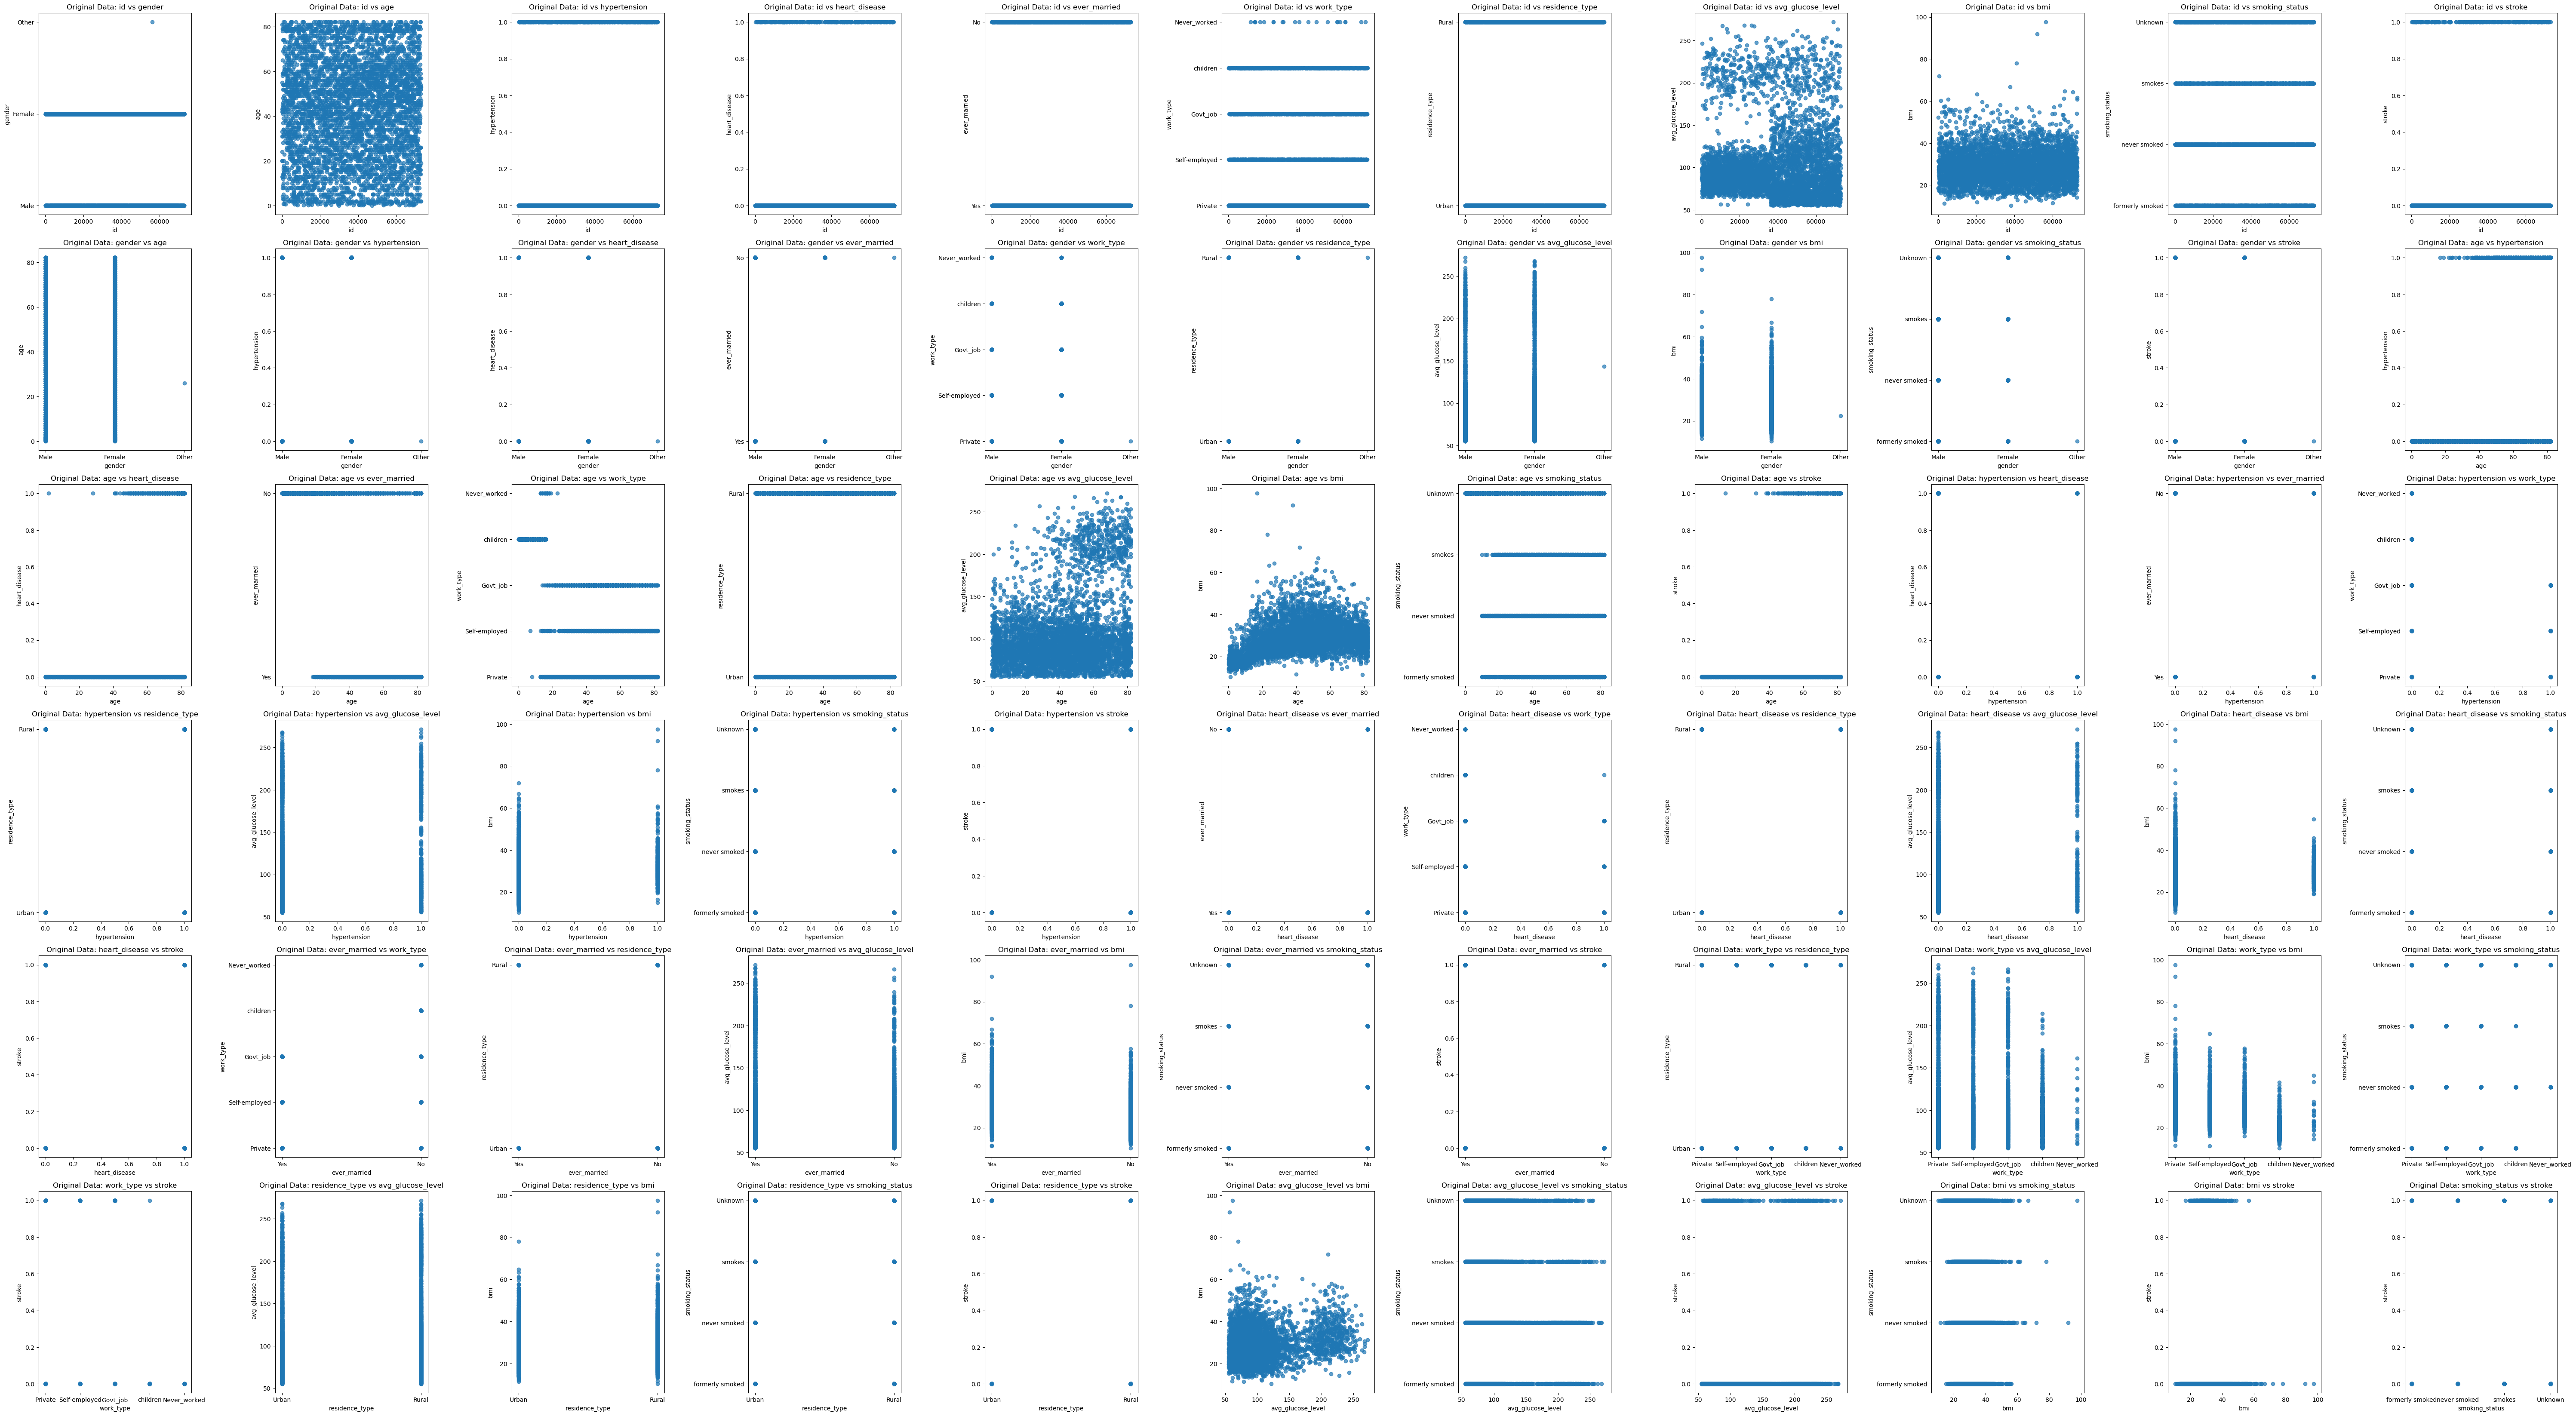

In [72]:
import matplotlib.pyplot as plt

def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = stroke_dropna.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(stroke_dropna, feature_names, title_prefix='Original Data: ')

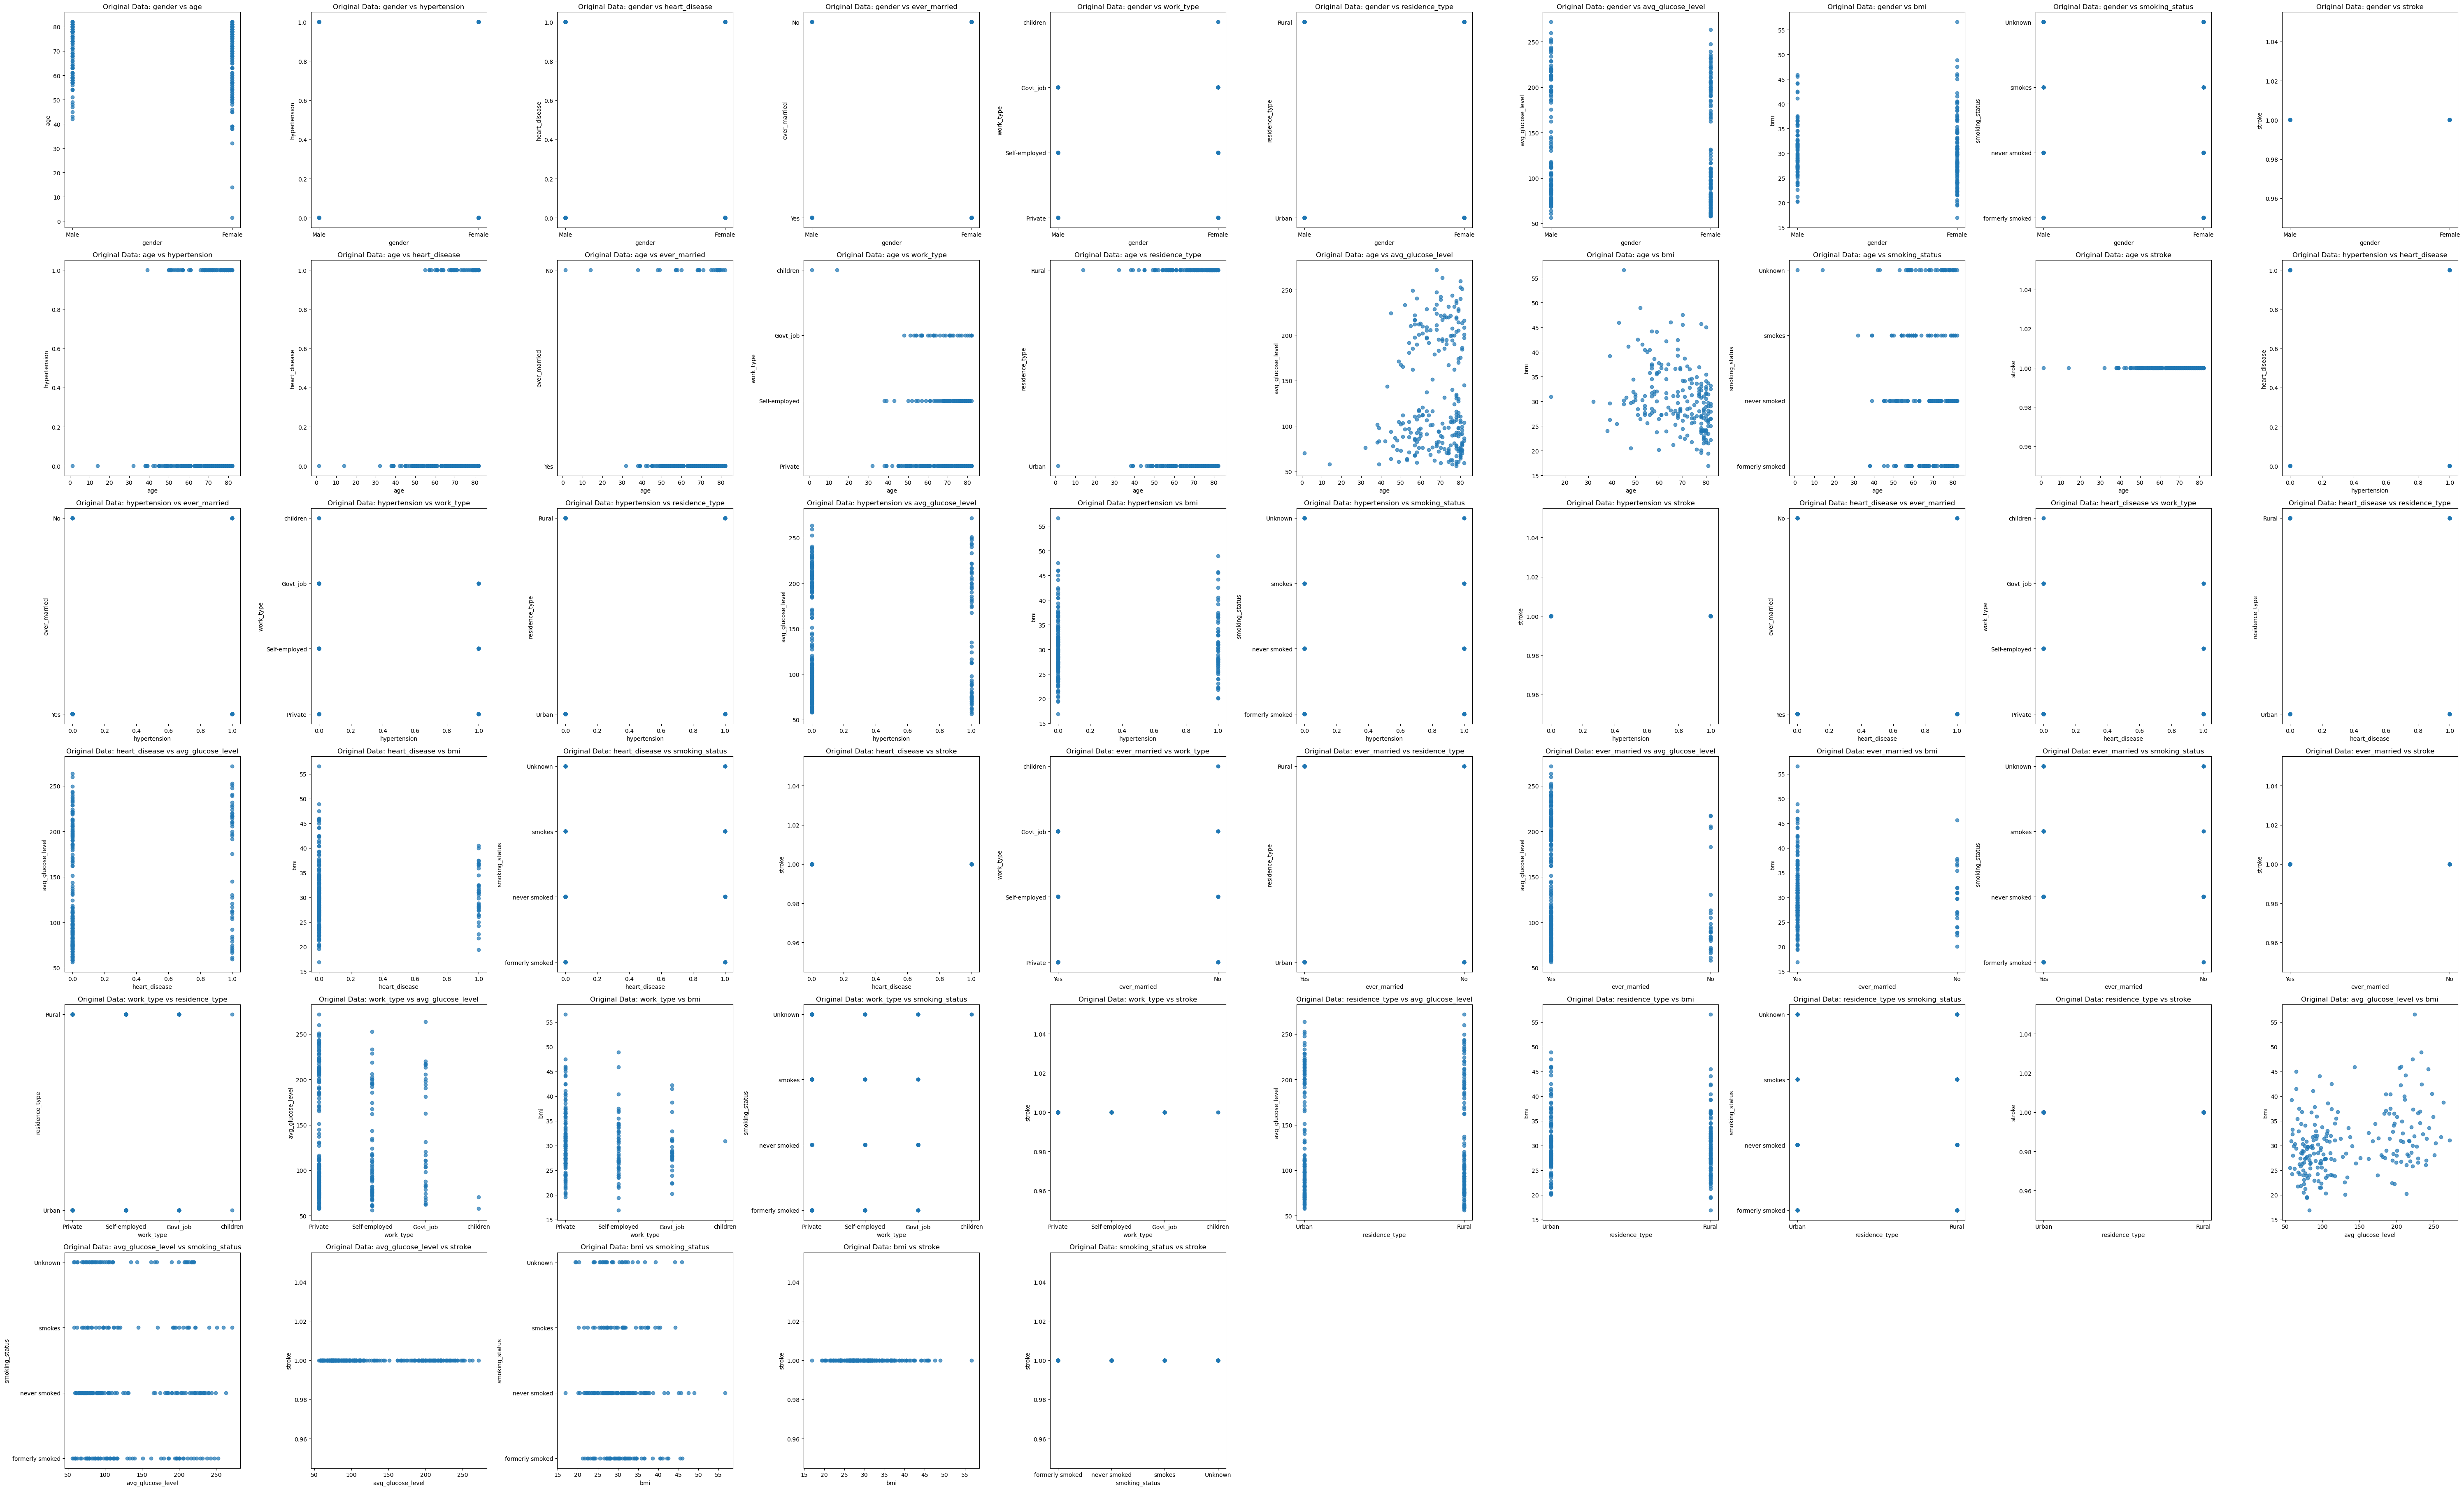

In [74]:
# Exploration rows of interest: only patients with stroke

plot_feature_pairs(with_stroke, with_stroke.columns, title_prefix='Original Data: ')

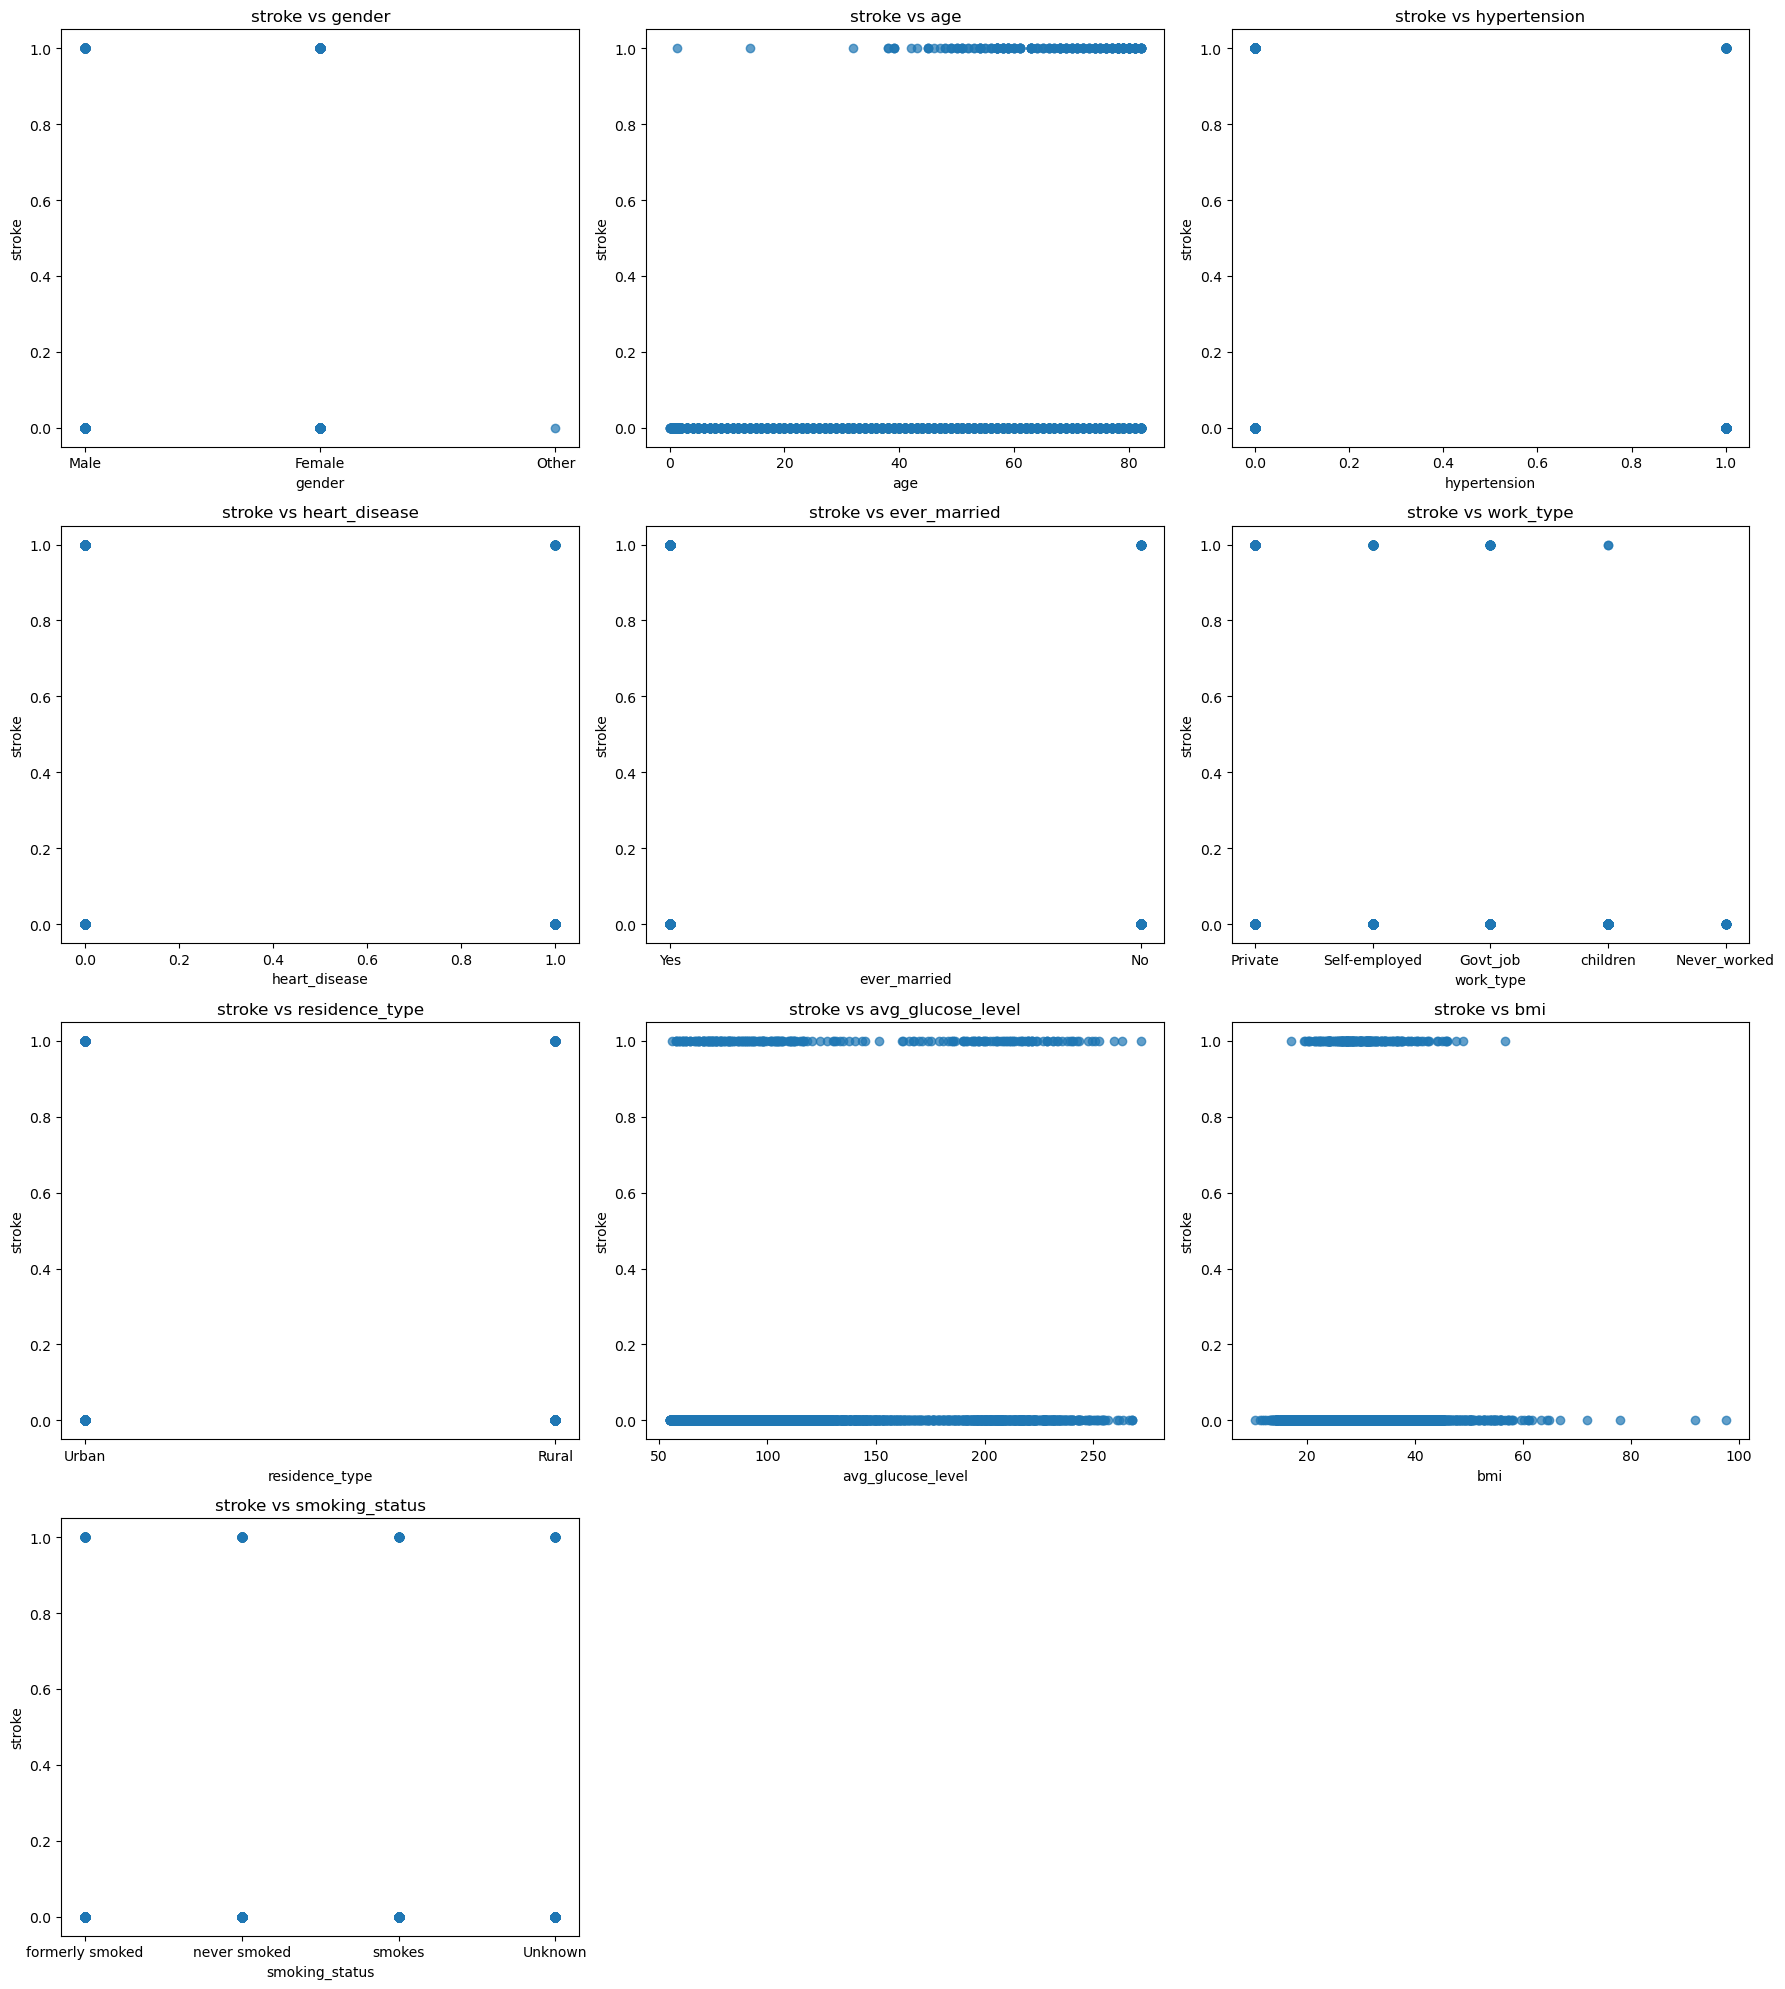

In [ ]:
def plot_target_vs_features(data, feature_names, target_variable='stroke'):
    """
    Simple function to create plots of target variable (stroke) against other features.
    """
    features_to_plot = [f for f in feature_names if f != target_variable]
    
    n_features = len(features_to_plot)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    plt.figure(figsize=(6 * n_cols, 5 * n_rows))
    
    for i, feature in enumerate(features_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.scatter(data[feature], data[target_variable], alpha=0.7)
        plt.xlabel(feature)
        plt.ylabel(target_variable)
        plt.title(f'{target_variable} vs {feature}')
    
    plt.tight_layout()
    plt.show()

# Get feature names and plot
feature_names = stroke_copy.columns
plot_target_vs_features(stroke_copy, feature_names, 'stroke')

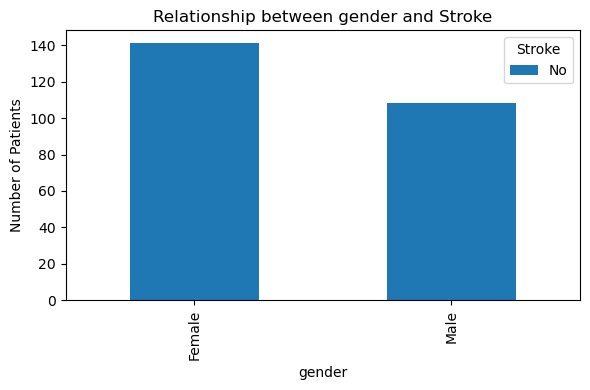

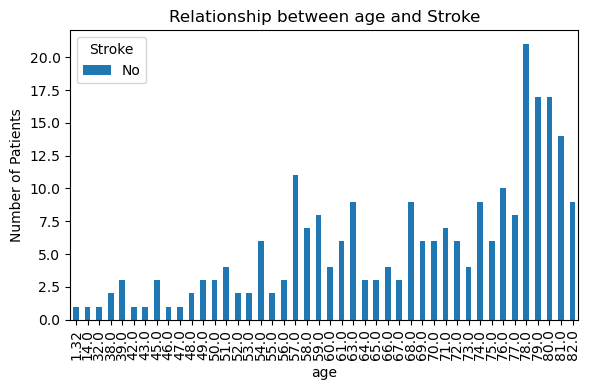

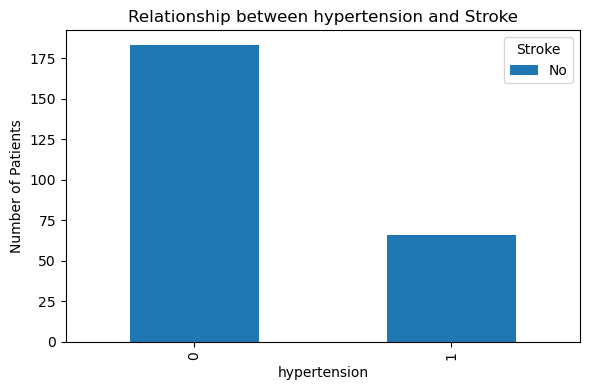

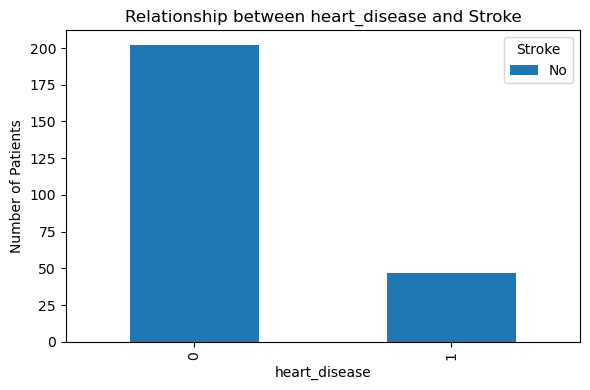

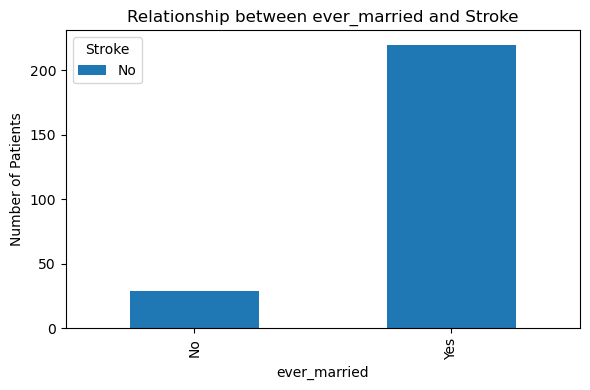

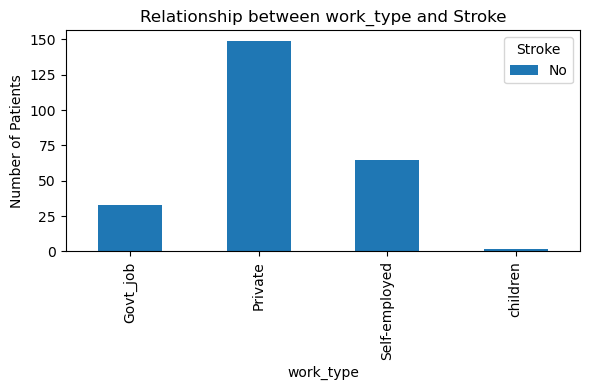

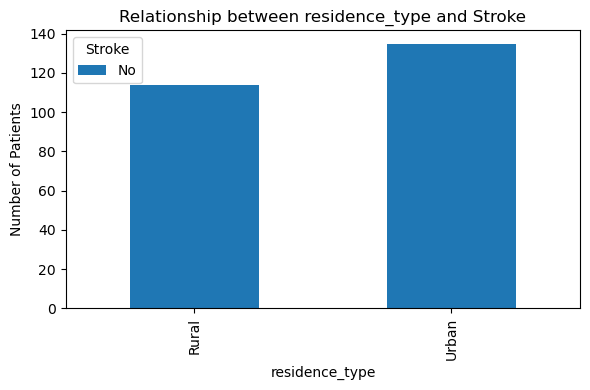

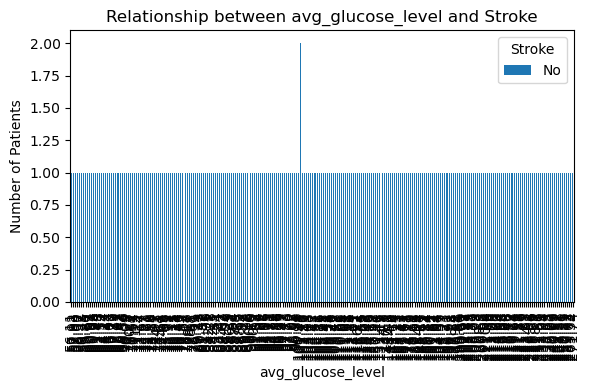

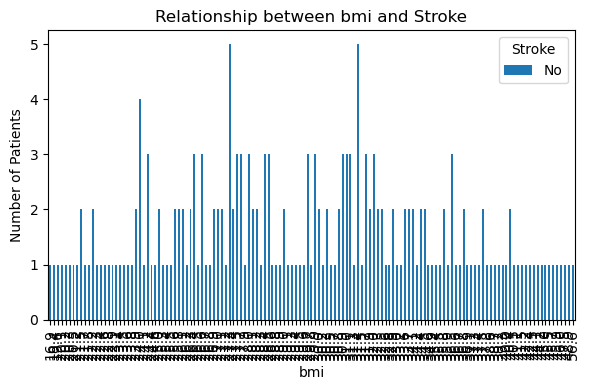

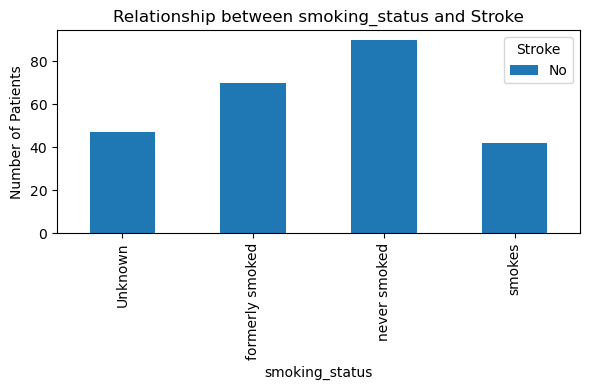

In [76]:
# Get feature names and plot patients with stroke


# Assume your DataFrame is called with_stroke and has 11 columns including 'stroke'
for col in with_stroke.columns:
    if col != 'stroke':
        # Group by variable and stroke
        counts = with_stroke.groupby([col, 'stroke']).size().unstack(fill_value=0)
        
        # Plot stacked bar chart
        counts.plot(kind='bar', stacked=True, figsize=(6,4))
        plt.title(f'Relationship between {col} and Stroke')
        plt.xlabel(col)
        plt.ylabel('Number of Patients')
        plt.legend(title='Stroke', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()


- Glucose average: 
	- min value is 55, max value is 271, we can’t take the mean, 
	- we could separated in groups: to take in consideracion, aleatory glucose test  in value more than 200 mg/dl is diagnosis of Diabetes, therefore it is other comorbidity (we need to consider that in the analysis, it is another risk factor, sometimes patients arrive ‘without chronic diseases’ but they have it underdiagnosticated several years ago
	-  I suggest this groups according with the American society of diabetes:  
		- 140 mg/dl or less (use to be a normal value)
		- 141 to 199 mg/dl  (prediabetes or oral glucose intolerance)
		- More than 200 mg/dl Diabetes.


- BMI: min value 10.3 and max value 97.6
	- We can use de BMI classification from the CDC: 
		- <18.5: Underweight
		- 18.5>25 Healthy Weight
		- 25>=30: Overweight
		- >= 30 Obesity
		- 30 to 35 Obesity class 1
		- 35 to 40 Obesity class 2
		- >=40 Obesity class 3 (severe Obesity)


<Axes: xlabel='bmi', ylabel='Count'>

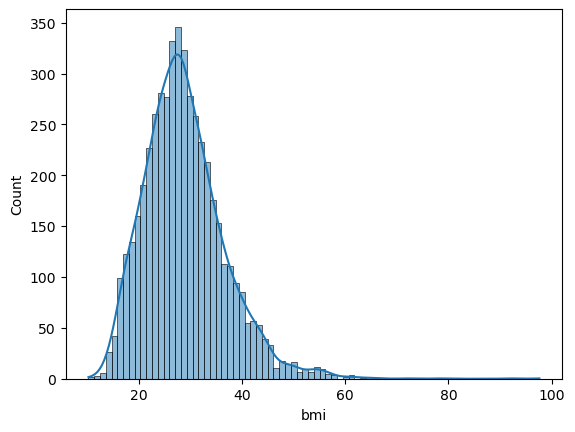

In [ ]:
import seaborn as sns
sns.histplot(stroke_copy['bmi'], kde=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features and target
features = ['age', 'gender', 'hypertension', 'heart_disease', 'smoking_status']
train_stroke = stroke[stroke['bmi'].notnull()]
test_stroke = stroke[stroke['bmi'].isnull()]

X_train = train_stroke[features]
y_train = train_stroke['bmi']
X_test = test_stroke[features]

model = RandomForestRegressor()
model.fit(X_train, y_train)
predicted_bmi = model.predict(X_test)

# Fill missing BMI
stroke.loc[stroke['bmi'].isnull(), 'bmi'] = predicted_bmi

ValueError: could not convert string to float: 'Male'